In [4]:
%matplotlib notebook

import logging

import emcee
import h5py
import numpy as np
import matplotlib.pyplot as plt

from os import path
import sys
sys.path.insert(0, path.abspath('../'))

from src import workdir, parse_model_parameter_file
from src.emulator import Emulator
from src.mcmc import Chain

In [3]:
exp_path = "test/pseudo_expdata.txt"
model_par = "model_parameter_dict_examples/ABCD.txt"
training_set = "test/model_results"
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par,
               training_data_path=training_set)

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.h5
[INFO][mcmc] Loading the model parameters space from model_parameter_dict_examples/ABCD.txt ...
[INFO][mcmc] Loading the experiment data from test/pseudo_expdata.txt ...
[INFO][mcmc] Initializing emulators for the training model ...
[INFO][emulator] loading training data from test/model_results ...
[INFO][emulator] All training data are loaded.
[INFO][emulator] 10 PCs explain 1.00000 of variance
[INFO][emulator] Training emulators...


/Users/chunshen/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.57475471e-04, -5.89299397e+00, -4.85084951e-04, -7.93709802e+00,
        3.94098461e-04,  4.06297514e+01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 140, 'nit': 30, 'warnflag': 2}
  ConvergenceWarning)


[INFO][emulator] GP 0: 0.43081 of variance, LML = 1287.3, kernel: 63.5**2 * RBF(length_scale=[10, 0.513, 9.32, 0.945]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 1: 0.37401 of variance, LML = 1181.8, kernel: 49**2 * RBF(length_scale=[5.51, 0.233, 10, 2.04]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 2: 0.10024 of variance, LML = 1236.7, kernel: 27.8**2 * RBF(length_scale=[4.17, 0.176, 10, 4.46]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 3: 0.07007 of variance, LML = 1283, kernel: 34.8**2 * RBF(length_scale=[10, 0.565, 7.21, 0.633]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 4: 0.02154 of variance, LML = 1084.4, kernel: 86.9**2 * RBF(length_scale=[4.98, 0.168, 10, 6.47]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 5: 0.00195 of variance, LML = 560.27, kernel: 132**2 * RBF(length_scale=[4.59, 0.157, 10, 1.31]) + WhiteKernel(noise_level=0.0001)
[INFO][emulator] GP 6: 0.00123 of variance, LML = 584.24, kernel: 216**2 * RBF(length_scale

[INFO][mcmc] Starting MCMC ...
[INFO][mcmc] no existing chain found, starting initial burn-in
[INFO][mcmc] running 100 walkers for 100 steps
[INFO][mcmc] step 10: acceptance fraction: mean 0.3690, std 0.1683, min 0.0000, max 0.8000
[INFO][mcmc] step 20: acceptance fraction: mean 0.3740, std 0.1230, min 0.0000, max 0.6500
[INFO][mcmc] step 30: acceptance fraction: mean 0.3703, std 0.1009, min 0.0333, max 0.6000
[INFO][mcmc] step 40: acceptance fraction: mean 0.3723, std 0.0805, min 0.1000, max 0.5250
[INFO][mcmc] step 50: acceptance fraction: mean 0.3762, std 0.0705, min 0.2200, max 0.5400
[INFO][mcmc] step 60: acceptance fraction: mean 0.3867, std 0.0676, min 0.2333, max 0.5500
[INFO][mcmc] step 70: acceptance fraction: mean 0.4043, std 0.0577, min 0.2714, max 0.5429
[INFO][mcmc] step 80: acceptance fraction: mean 0.4203, std 0.0546, min 0.3000, max 0.5750
[INFO][mcmc] step 90: acceptance fraction: mean 0.4397, std 0.0514, min 0.3000, max 0.5667
[INFO][mcmc] step 100: acceptance fracti

<IPython.core.display.Javascript object>


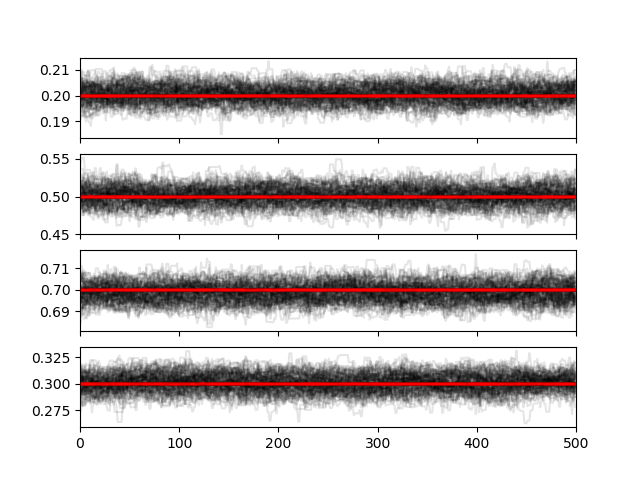

<IPython.core.display.Javascript object>


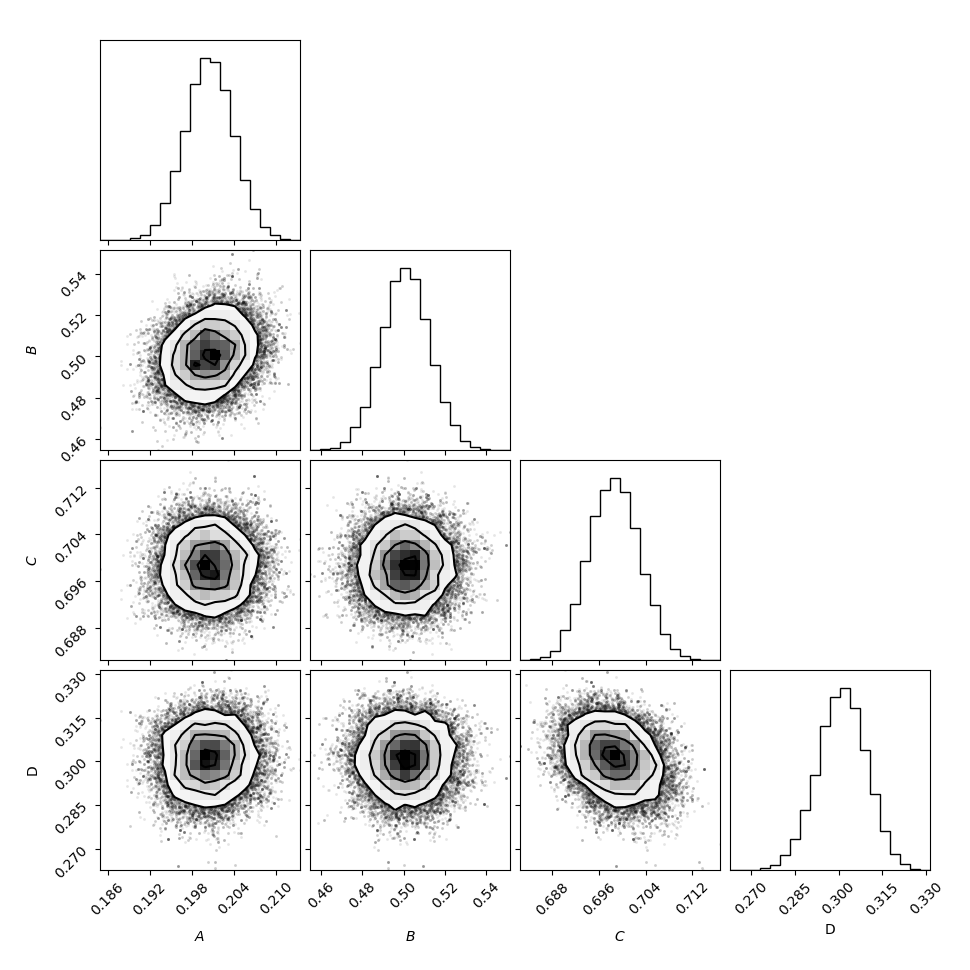

[(0.20043579175237894, 0.003426103402690117, 0.003402245417828881), (0.5010527065998107, 0.011540453040570942, 0.011684715059257611), (0.6986123082760185, 0.004334636316484453, 0.004309069284030298), (0.30128817292981447, 0.008080140957552162, 0.008500154851480535)]


<IPython.core.display.Javascript object>


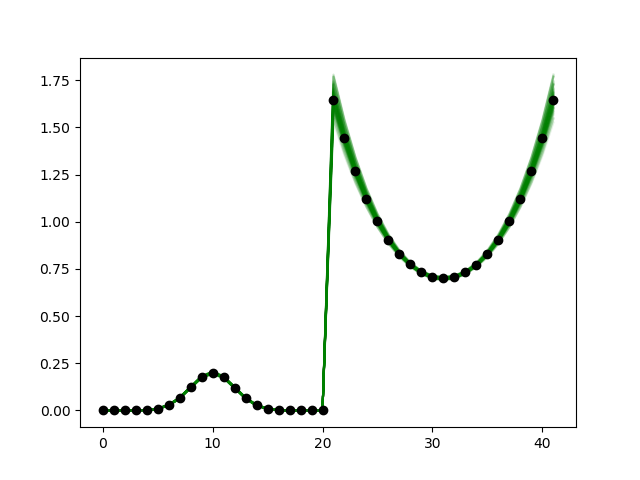

In [4]:
nsteps = 500
nwalkers = 100
nburnsteps = 200
status = None
mymcmc.run_mcmc(nsteps=nsteps, nburnsteps=nburnsteps,
                    nwalkers=nwalkers, status=status)